In [51]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_pickle("/content/drive/My Drive/postings_gold.pkl")

df.head()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,job_id,title,description,job_skills,job_industries,pay_period,compensation_type,max_salary,med_salary,min_salary,...,city,fips,name,description_company,address,follower_count,time_recorded,emp_year,emp_month,currency
0,921716,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Marketing; Sales,Real Estate,HOURLY,BASE_SALARY,20.0,NaN,17.0,...,Jersey City,34021.0,Corcoran Sawyer Smith,With years of experience helping local buyers ...,242 Tenth Street,2351.0,1.713409e+09,2024.0,4.0,USD
1,1829192,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",Health Care Provider,NaN,HOURLY,BASE_SALARY,50.0,NaN,30.0,...,NaN,8069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
2,10998357,Assitant Restaurant Manager,The National Exemplar is accepting application...,Management; Manufacturing,Restaurants,YEARLY,BASE_SALARY,65000.0,NaN,45000.0,...,Mariemont,39061.0,The National Exemplar,"In April of 1983, The National Exemplar began ...",6880 Wooster Pike,40.0,1.713279e+09,2024.0,4.0,USD
3,23221523,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,Other,Law Practice,YEARLY,BASE_SALARY,175000.0,NaN,140000.0,...,Lake Success,36059.0,"Abrams Fensterman, LLP","Abrams Fensterman, LLP is a full-service law f...",3 Dakota Drive,2427.0,1.712897e+09,2024.0,4.0,USD
4,35982263,Service Technician,Looking for HVAC service tech with experience ...,Information Technology,Facilities Services,YEARLY,BASE_SALARY,80000.0,NaN,60000.0,...,NaN,19057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  Int64  
 1   title                       123849 non-null  object 
 2   description                 123842 non-null  object 
 3   job_skills                  122096 non-null  object 
 4   job_industries              122313 non-null  object 
 5   pay_period                  36073 non-null   object 
 6   compensation_type           36073 non-null   object 
 7   max_salary                  29793 non-null   float64
 8   med_salary                  6280 non-null    float64
 9   min_salary                  29793 non-null   float64
 10  normalized_salary           36073 non-null   float64
 11  job_benefit_categories      28735 non-null   object 
 12  views                       122160 non-null  float64
 13  skills_desc   

                      variable  n_categories
0              job_posting_url        123849
1                  description        107827
2              application_url         84800
3                        title         72521
4                          url         24473
5                 company_name         24428
6                         name         24428
7          description_company         24164
8                      address         19476
9                     location          8526
10            zip_code_company          7779
11              job_industries          4522
12              posting_domain          4443
13                        city          4124
14                 skills_desc          2212
15                  job_skills          2036
16                       state           788
17          company_industries           154
18                     country            81
19      job_benefit_categories            15
20         formatted_work_type             7
21        

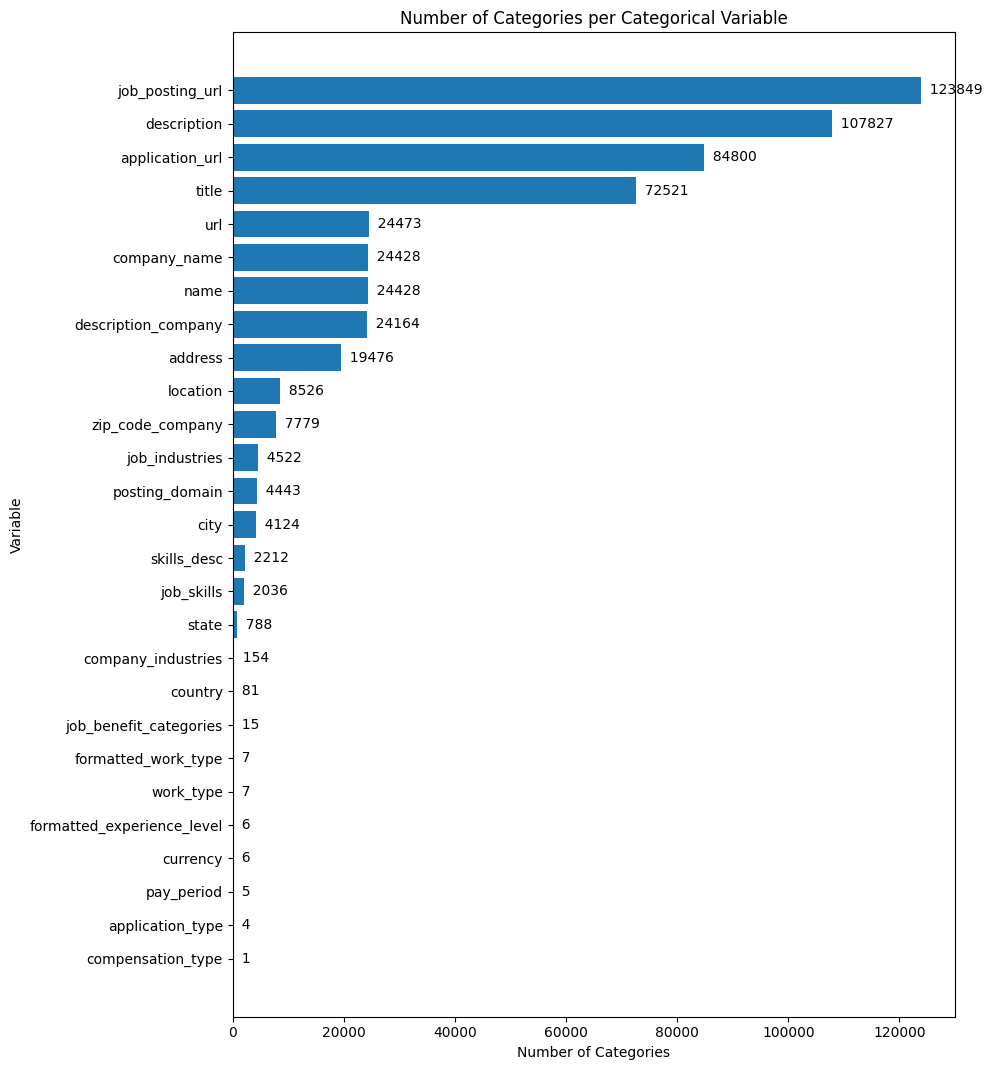

In [53]:
# === Identify categorical variables and count their categories ===
import pandas as pd
import matplotlib.pyplot as plt


# Identify categorical columns
categorical_columns = [
    col for col in df.columns
    if df[col].dtype.name in ["object", "category"]
]

# Build summary table
summary = (
    pd.DataFrame({
        "variable": categorical_columns,
        "n_categories": [df[col].nunique(dropna=True) for col in categorical_columns]
    })
    .sort_values("n_categories", ascending=False)
    .reset_index(drop=True)
)

# Display table
print(summary)

# === Plot number of categories per column ===
plt.figure(figsize=(10, max(4, 0.4 * len(summary))))

plt.barh(summary["variable"], summary["n_categories"])
plt.gca().invert_yaxis()

# Add labels
for i, value in enumerate(summary["n_categories"]):
    plt.text(value, i, f"  {value}", va="center")

plt.xlabel("Number of Categories")
plt.ylabel("Variable")
plt.title("Number of Categories per Categorical Variable")
plt.tight_layout()
plt.show()


In [54]:
# === Convert selected object columns into categorical ===

categorical_columns = [
    "company_industries",
    "country",
    "job_benefit_categories",
    "formatted_work_type",
    "work_type",
    "formatted_experience_level",
    "currency",
    "pay_period",
    "application_type",
    "compensation_type"
]

for col in categorical_columns:
    # Convert to category dtype
    df[col] = df[col].astype("category")


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   job_id                      123849 non-null  Int64   
 1   title                       123849 non-null  object  
 2   description                 123842 non-null  object  
 3   job_skills                  122096 non-null  object  
 4   job_industries              122313 non-null  object  
 5   pay_period                  36073 non-null   category
 6   compensation_type           36073 non-null   category
 7   max_salary                  29793 non-null   float64 
 8   med_salary                  6280 non-null    float64 
 9   min_salary                  29793 non-null   float64 
 10  normalized_salary           36073 non-null   float64 
 11  job_benefit_categories      28735 non-null   category
 12  views                       122160 non-null  float64 
 13 

In [56]:
# === Show category counts for the 'country' column ===

# Count occurrences
country_counts = (
    df["country"]
    .value_counts(dropna=False)
    .reset_index()
)

# Rename columns for clarity
country_counts.columns = ["country", "count"]

# Display the result
country_counts


,country,count
0,US,109995
1,GB,3000
2,0,2632
3,NaN,1718
4,CA,1399
...,...,...
77,SC,1
78,TR,1
79,SV,1
80,TZ,1


In [57]:
# === Map country values into: US / Europe / Other ===

# Define the list of European country codes
europe_countries = [
    "GB", "DE", "FR", "NL", "IE", "ES", "IT", "SE", "NO", "CH", "DK",
    "PT", "PL", "AT", "BE", "CZ", "RO", "HU", "FI", "LU", "GR", "BG",
    "EE", "LT", "LV", "SK", "SI", "HR"
]

# Function to map values
def map_country(value):
    # Handle missing values
    if pd.isna(value):
        return "Other"

    # Map US
    if value == "US":
        return "US"

    # Map Europe
    if value in europe_countries:
        return "Europe"

    # Everything else
    return "Other"

# Apply mapping
df["country_grouped"] = df["country"].apply(map_country)

# Convert to category dtype
df["country_grouped"] = df["country_grouped"].astype("category")

# Optional: show distribution
df["country_grouped"].value_counts()


,count
country_grouped,
US,109995
Europe,6451
Other,5685


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   job_id                      123849 non-null  Int64   
 1   title                       123849 non-null  object  
 2   description                 123842 non-null  object  
 3   job_skills                  122096 non-null  object  
 4   job_industries              122313 non-null  object  
 5   pay_period                  36073 non-null   category
 6   compensation_type           36073 non-null   category
 7   max_salary                  29793 non-null   float64 
 8   med_salary                  6280 non-null    float64 
 9   min_salary                  29793 non-null   float64 
 10  normalized_salary           36073 non-null   float64 
 11  job_benefit_categories      28735 non-null   category
 12  views                       122160 non-null  float64 
 13 

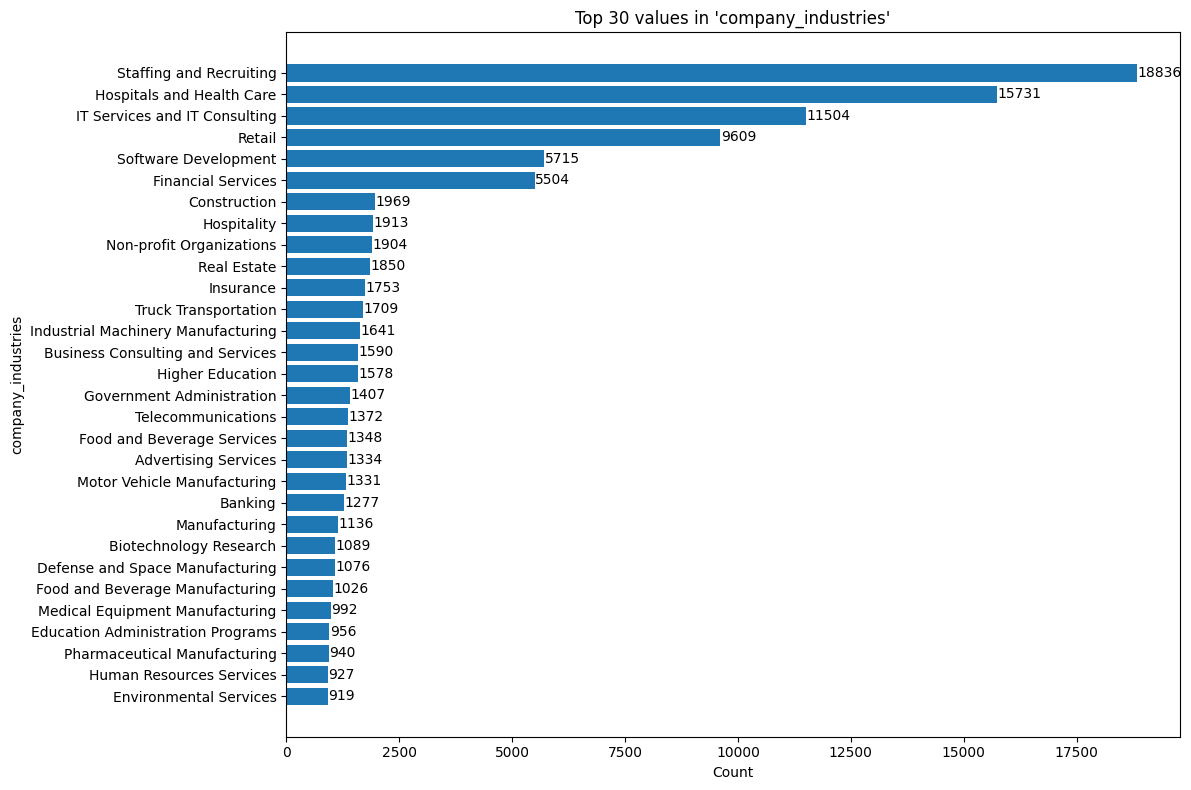

In [59]:
# --- Table + bar chart for company_industries (simple version) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Config
COL = "company_industries"
TOP_N_TABLE = 154   # top rows for the table
TOP_N_CHART = 30   # number of bars to display in the chart

# Work on a clean object version to avoid hashing issues
s_company_ind = df[COL].astype("object")

# Build frequency table (includes NaN as a category)
company_industries_counts = (
    s_company_ind
    .value_counts(dropna=False)
    .rename("count")
    .reset_index()
    .rename(columns={"index": COL})
)

# === Display top 50 in table ===
company_industries_counts.head(TOP_N_TABLE)

# === Bar chart (top N, excluding NaN) ===
plot_df = company_industries_counts[company_industries_counts[COL].notna()].head(TOP_N_CHART)

plt.figure(figsize=(12, 8))

# Create bars
bars = plt.barh(plot_df[COL].astype(str), plot_df["count"])
plt.gca().invert_yaxis()

# Labels and title
plt.title(f"Top {len(plot_df)} values in '{COL}'")
plt.xlabel("Count")
plt.ylabel(COL)

# Add value labels beside bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10,                              # offset to the right
        bar.get_y() + bar.get_height() / 2,
        str(int(width)),
        va="center"
    )

plt.tight_layout()
plt.show()


In [60]:
company_industries_counts.head(TOP_N_TABLE)

,company_industries,count
0,Staffing and Recruiting,18836
1,Hospitals and Health Care,15731
2,IT Services and IT Consulting,11504
3,Retail,9609
4,Software Development,5715
...,...,...
149,Warehousing and Storage,2
150,Wholesale Import and Export,2
151,Mobile Gaming Apps,1
152,Wireless Services,1


In [61]:
df["company_industries"].dropna().unique().tolist()


['Real Estate',
 'Restaurants',
 'Law Practice',
 'Non-profit Organizations',
 'Design Services',
 'Hospitals and Health Care',
 'Religious Institutions',
 'Food and Beverage Services',
 'Architecture and Planning',
 'Staffing and Recruiting',
 'Wellness and Fitness Services',
 'Advertising Services',
 'Software Development',
 'Recreational Facilities',
 'Medical Equipment Manufacturing',
 'Facilities Services',
 'Higher Education',
 'Consumer Services',
 'Human Resources Services',
 'Banking',
 'Individual and Family Services',
 'Chemical Manufacturing',
 'Financial Services',
 'Mental Health Care',
 'Business Consulting and Services',
 'Computers and Electronics Manufacturing',
 'IT Services and IT Consulting',
 'Insurance',
 'Defense and Space Manufacturing',
 'Retail Luxury Goods and Jewelry',
 'Food and Beverage Manufacturing',
 'Manufacturing',
 'Retail Apparel and Fashion',
 'Government Administration',
 'Construction',
 'Government Relations Services',
 'Retail',
 'Information 

In [62]:
# ----------------------------
# Industries grouping pipeline
# ----------------------------
# Guidelines:
# - Comments are in English only.
# - Do not mutate `df` in-place; create new columns.
# - Preserve the 154 original entries (including duplicates).
# - Group by the FIRST token before ';'.
# - Apply your manual overrides exactly as provided.
# - New objects names: df_industries, df_with_industry_group, industries_freq
# - No guessing column names: we use exactly 'company_industries'.

import pandas as pd
import matplotlib.pyplot as plt

# 1) The 154 original categories (exactly as provided earlier).
categories_154 = [
 'Real Estate','Restaurants','Law Practice','Non-profit Organizations','Design Services',
 'Hospitals and Health Care','Religious Institutions','Food and Beverage Services',
 'Architecture and Planning','Staffing and Recruiting','Wellness and Fitness Services',
 'Advertising Services','Software Development','Recreational Facilities',
 'Medical Equipment Manufacturing','Facilities Services','Higher Education','Consumer Services',
 'Human Resources Services','Banking','Individual and Family Services','Chemical Manufacturing',
 'Financial Services','Mental Health Care','Business Consulting and Services',
 'Computers and Electronics Manufacturing','IT Services and IT Consulting','Insurance',
 'Defense and Space Manufacturing','Retail Luxury Goods and Jewelry',
 'Food and Beverage Manufacturing','Manufacturing','Retail Apparel and Fashion',
 'Government Administration','Construction','Government Relations Services','Retail',
 'Information Services','Paper and Forest Product Manufacturing','Mining','Civil Engineering',
 'International Affairs','Media Production',
 'Appliances, Electrical, and Electronics Manufacturing','Motor Vehicle Manufacturing',
 'Events Services','Semiconductor Manufacturing','Education Administration Programs',
 'Writing and Editing','Public Safety','Plastics Manufacturing','Truck Transportation',
 'Transportation, Logistics, Supply Chain and Storage',
 'Aviation and Aerospace Component Manufacturing','Spectator Sports',
 'Industrial Machinery Manufacturing','Administration of Justice','Machinery Manufacturing',
 'Medical Practices','E-Learning Providers','Entertainment Providers',
 'Civic and Social Organizations','Performing Arts','Pharmaceutical Manufacturing',
 'Environmental Services','Legal Services','Utilities','Accounting',
 'Computer and Network Security','Newspaper Publishing','Travel Arrangements',
 'Telecommunications','Biotechnology Research','Think Tanks',
 'Museums, Historical Sites, and Zoos','Public Relations and Communications Services',
 'Retail Office Equipment','Translation and Localization','Primary and Secondary Education',
 'Veterinary Services','Research Services','International Trade and Development','Hospitality',
 'Musicians','Wholesale Building Materials','Airlines and Aviation','Oil and Gas',
 'Automation Machinery Manufacturing','Furniture and Home Furnishings Manufacturing',
 'Venture Capital and Private Equity Principals','Packaging and Containers Manufacturing',
 'Outsourcing and Offshoring Consulting','Technology, Information and Internet',
 'Security and Investigations','Professional Training and Coaching',
 'Sporting Goods Manufacturing','Computer Hardware Manufacturing',
 'Book and Periodical Publishing','Wholesale',
 'Renewable Energy Semiconductor Manufacturing',
 'Personal Care Product Manufacturing','Law Enforcement','Beverage Manufacturing',
 'Armed Forces','Gambling Facilities and Casinos','Investment Banking',
 'Hospitals and Health Care; Medical Practices',
 'IT Services and IT Consulting; Software Development',
 'Freight and Package Transportation','Manufacturing; Retail Apparel and Fashion',
 'Textile Manufacturing','Shipbuilding','Computer Games',
 'Online Audio and Video Media','Fundraising','Railroad Equipment Manufacturing','Farming',
 'IT Services and IT Consulting; International Trade and Development',
 'Philanthropic Fundraising Services','Financial Services; Real Estate',
 'IT Services and IT Consulting; Staffing and Recruiting','Alternative Medicine','Libraries',
 'Broadcast Media Production and Distribution','Printing Services','Retail Groceries',
 'Market Research','Executive Offices',
 'Software Development; Technology, Information and Internet','Artists and Writers',
 'Warehousing and Storage','Consumer Services; Real Estate','Mobile Gaming Apps',
 'Investment Management','Tobacco Manufacturing',
 'Personal Care Product Manufacturing; Retail','Maritime Transportation',
 'Wholesale Import and Export','Graphic Design','Fisheries','Political Organizations',
 'Glass, Ceramics and Concrete Manufacturing','Nanotechnology Research',
 'Public Policy Offices','Wireless Services','Dairy Product Manufacturing',
 'Computer Networking Products','Food and Beverage Manufacturing; Retail',
 'Leasing Non-residential Real Estate','Legislative Offices','Photography',
 'Animation and Post-production','Strategic Management Services',
 'Alternative Dispute Resolution'
]

# 2) Helper: first token before ';'
def first_token(x: str) -> str:
    if not isinstance(x, str):
        return ""
    return x.split(";")[0].strip()

# 3) Base grouping via concise keyword rules (kept minimal) + your explicit overrides
#    First match wins. Anything not matched -> 'Other'.
PATTERN_GROUPS = [
    ("Tech & Internet", [
        "software", "technology, information and internet", "computer hardware",
        "computers and electronics manufacturing", "telecommunications",
        "computer and network security", "semiconductor", "networking",
        "online audio and video media", "mobile gaming", "computer games",
        "wireless services", "information services"
    ]),
    ("Healthcare & Life Sciences", [
        "hospitals and health care", "medical practices", "biotechnology research",
        "pharmaceutical", "medical equipment", "veterinary", "mental health",
        "wellness and fitness", "alternative medicine"
    ]),
    ("Finance & Insurance", [
        "financial services", "banking", "insurance", "investment banking",
        "investment management", "venture capital", "private equity"
    ]),
    ("Manufacturing", [
        "manufacturing", "appliances, electrical", "industrial machinery",
        "machinery manufacturing", "plastics manufacturing", "chemical manufacturing",
        "paper and forest product manufacturing", "glass, ceramics and concrete",
        "textile manufacturing", "personal care product manufacturing",
        "packaging and containers", "tobacco manufacturing", "automation machinery"
    ]),
    ("Retail & Wholesale", [
        "retail", "retail apparel and fashion", "retail luxury goods",
        "retail groceries", "retail office equipment", "wholesale",
        "wholesale building materials", "wholesale import and export"
    ]),
    ("Transport & Logistics", [
        "transportation, logistics, supply chain and storage", "truck transportation",
        "freight and package", "warehousing and storage", "railroad equipment",
        "maritime transportation", "airlines and aviation",
        "aviation and aerospace component", "shipbuilding"
    ]),
    ("Energy, Utilities & Mining", ["oil and gas", "utilities", "mining", "renewable energy semiconductor"]),
    ("Construction & Real Estate", ["construction", "real estate", "architecture and planning", "civil engineering",
                                    "leasing non-residential real estate"]),
    ("Professional & Business Services", [
        "business consulting", "staffing and recruiting", "human resources services", "legal services",
        "law practice", "accounting", "translation and localization", "market research",
        "executive offices", "design services", "graphic design", "strategic management services",
        "outsourcing and offshoring", "professional training and coaching",
        "security and investigations", "alternative dispute resolution"
    ]),
    ("Government & Public Sector", [
        "government administration", "government relations", "international affairs",
        "administration of justice", "public safety", "law enforcement", "armed forces",
        "public policy offices", "legislative offices", "political organizations"
    ]),
    ("Education & Research", [
        "higher education", "primary and secondary education",
        "education administration programs", "e-learning providers",
        "research services", "think tanks", "libraries", "museums, historical sites"
    ]),
    ("Media, Marketing & Entertainment", [
        "media production", "broadcast media", "newspaper publishing", "book and periodical publishing",
        "performing arts", "entertainment providers", "artists and writers",
        "animation and post-production", "advertising services",
        "public relations and communications", "writing and editing", "photography",
        "events services", "musicians"
    ]),
    ("Hospitality, Travel & Leisure", [
        "hospitality", "restaurants", "recreational facilities",
        "travel arrangements", "spectator sports", "gambling facilities and casinos"
    ]),
    ("Agriculture & Natural Resources", ["farming", "fisheries", "environmental services"]),
    ("Food & Beverage", ["food and beverage manufacturing", "food and beverage services",
                         "beverage manufacturing", "dairy product manufacturing"]),
]

# Manual overrides exactly as requested (right side is the final group name)
OVERRIDES = {
    "Consumer Services; Real Estate": "Construction & Real Estate",
    "Accounting": "Finance & Insurance",
    "Fundraising": "Finance & Insurance",
    "Semiconductor Manufacturing": "Manufacturing",
    "Nanotechnology Research": "Tech & Internet",
    "IT Services and IT Consulting": "IT Services",
    "IT Services and IT Consulting; Software Development": "IT Services",
    "IT Services and IT Consulting; International Trade and Development": "IT Services",
    "IT Services and IT Consulting; Staffing and Recruiting": "IT Services",
    "Food and Beverage Services": "Other",
}

def assign_group(raw: str) -> str:
    """Assign group with overrides first, then pattern rules, else 'Other'."""
    if not isinstance(raw, str):
        return "Other"
    # 3.1 overrides on the full original string (including ';' cases)
    if raw in OVERRIDES:
        return OVERRIDES[raw]
    # 3.2 base on first token
    token = first_token(raw).lower()
    for group, keywords in PATTERN_GROUPS:
        for kw in keywords:
            if kw in token:
                return group
    return "Other"

# 4) Build df_industries preserving all 154 rows (including duplicates)
df_industries = pd.DataFrame({
    "company_industries_original": categories_154
})
df_industries["first_token"] = df_industries["company_industries_original"].apply(first_token)
df_industries["group"] = df_industries["company_industries_original"].apply(assign_group)

# 5) Map the main df (use FIRST token) -> group (take first match if duplicates)
#    Build a mapping dict: first_token -> first group encountered in df_industries
map_first = {}
for _, r in df_industries.iterrows():
    t = r["first_token"]
    if t and t not in map_first:
        map_first[t] = r["group"]

# 6) Create grouped column on a COPY of df (no mutation of original columns)
df_with_industry_group = df.copy()
df_with_industry_group["company_industries_first"] = df_with_industry_group["company_industries"].astype(str).str.split(";").str[0].str.strip()
df_with_industry_group["industry_group_15"] = df_with_industry_group["company_industries_first"].map(map_first)

# 7) Frequency table (keep NaN explicitly; then fill for plotting)
industries_freq = (
    df_with_industry_group["industry_group_15"]
    .value_counts(dropna=False)
    .rename_axis("group")
    .reset_index(name="count")
)



# 9) Optional: peek the first 10 rows of df_industries to verify the mapping
df_industries.head(10)


,company_industries_original,first_token,group
0,Real Estate,Real Estate,Construction & Real Estate
1,Restaurants,Restaurants,"Hospitality, Travel & Leisure"
2,Law Practice,Law Practice,Professional & Business Services
3,Non-profit Organizations,Non-profit Organizations,Other
4,Design Services,Design Services,Professional & Business Services
5,Hospitals and Health Care,Hospitals and Health Care,Healthcare & Life Sciences
6,Religious Institutions,Religious Institutions,Other
7,Food and Beverage Services,Food and Beverage Services,Other
8,Architecture and Planning,Architecture and Planning,Construction & Real Estate
9,Staffing and Recruiting,Staffing and Recruiting,Professional & Business Services


In [63]:
# --- Create upgraded DF without mutating df ---
# df --> df_v2 (adding industry_group_15 immediately after company_industries)

df_v2 = df.copy()

# 1) Build mapping dictionary (first_token → group)
mapping_dict = (
    df_industries
    .drop_duplicates(subset="first_token")
    .set_index("first_token")["group"]
    .to_dict()
)

# 2) Compute the group (using first token internally, without saving it)
industry_group = (
    df_v2["company_industries"]
    .astype(str)
    .str.split(";")
    .str[0]
    .str.strip()
    .map(mapping_dict)
)

# 3) Insert the new column *right after the original column*
orig_idx = df_v2.columns.get_loc("company_industries")
df_v2.insert(orig_idx + 1, "industry_group_15", industry_group)

# 4) Frequency table
industries_freq = (
    df_v2["industry_group_15"]
    .value_counts(dropna=False)
    .rename_axis("group")
    .reset_index(name="count")
)

display(industries_freq)


,group,count
0,Professional & Business Services,23284
1,Healthcare & Life Sciences,20346
2,Retail & Wholesale,12364
3,IT Services,11573
4,Manufacturing,10566
5,Finance & Insurance,9158
6,Tech & Internet,8625
7,Construction & Real Estate,4786
8,Other,4764
9,Education & Research,3568


In [64]:
# --- Reposition country_grouped inside df_v2 ---

# 1) Extract the existing column
country_group_col = df_v2["country_grouped"]

# 2) Drop it from the current position
df_v2 = df_v2.drop(columns=["country_grouped"])

# 3) Find the index of 'country'
country_idx = df_v2.columns.get_loc("country")

# 4) Insert 'country_grouped' immediately after it
df_v2.insert(country_idx + 1, "country_grouped", country_group_col)

# Optional: verify
df_v2.head(3)


,job_id,title,description,job_skills,job_industries,pay_period,compensation_type,max_salary,med_salary,min_salary,...,city,fips,name,description_company,address,follower_count,time_recorded,emp_year,emp_month,currency
0,921716,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Marketing; Sales,Real Estate,HOURLY,BASE_SALARY,20.0,NaN,17.0,...,Jersey City,34021.0,Corcoran Sawyer Smith,With years of experience helping local buyers ...,242 Tenth Street,2351.0,1.713409e+09,2024.0,4.0,USD
1,1829192,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",Health Care Provider,NaN,HOURLY,BASE_SALARY,50.0,NaN,30.0,...,NaN,8069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
2,10998357,Assitant Restaurant Manager,The National Exemplar is accepting application...,Management; Manufacturing,Restaurants,YEARLY,BASE_SALARY,65000.0,NaN,45000.0,...,Mariemont,39061.0,The National Exemplar,"In April of 1983, The National Exemplar began ...",6880 Wooster Pike,40.0,1.713279e+09,2024.0,4.0,USD


In [65]:
df_v2.select_dtypes(include="category").info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   pay_period                  36073 non-null   category
 1   compensation_type           36073 non-null   category
 2   job_benefit_categories      28735 non-null   category
 3   formatted_work_type         123849 non-null  category
 4   work_type                   123849 non-null  category
 5   application_type            123849 non-null  category
 6   formatted_experience_level  94440 non-null   category
 7   company_industries          121974 non-null  category
 8   country                     122131 non-null  category
 9   country_grouped             122131 non-null  category
 10  currency                    36073 non-null   category
dtypes: category(11)
memory usage: 1.4 MB


In [66]:
# Frequency table for state
state_freq = (
    df_v2["state"]
    .value_counts(dropna=False)
    .rename_axis("state")
    .reset_index(name="count")
)

display(state_freq.head(15))  # Show first 15
print("Number of unique states:", df_v2["state"].nunique(dropna=False))


,state,count
0,0,8521
1,California,6861
2,Texas,6619
3,NY,6366
4,CA,6170
5,TX,3653
6,North Carolina,3247
7,IL,3032
8,PA,2897
9,New Jersey,2888


Number of unique states: 789


In [67]:
sorted(df_v2["state"].dropna().unique())[:50]


[' CA',
 ' Chorley ',
 ' D.C.',
 ' MA ',
 ' New York',
 '(TN)',
 '-',
 '.',
 '......',
 '0',
 '01824',
 '11th Floor',
 '1828 Swift Street',
 '21146',
 '2141 s 211th St #G',
 '28801',
 '40223',
 '49423',
 '55077',
 '84401',
 '85226',
 '8815 Conroy Windermere Rd, STE 108',
 '94086',
 '94545',
 '97224',
 '99669',
 'A Coruña',
 'AB',
 'AG',
 'AK',
 'AL',
 'AL - Alabama',
 'AMSTERDAM',
 'AR',
 'ARIZONA',
 'AUK',
 'AZ',
 'AZ - Arizona',
 'Aargau',
 'Aarhus',
 'Aberdeenshire',
 'Al',
 'Al.',
 'Alabama',
 'Alaska',
 'Alberta',
 'Alpes Maritimes',
 'Alto Adige',
 'Amstelplein',
 'Andhra Pradesh']

In [68]:
sorted(df_v2["state"].dropna().unique())[:100]


[' CA',
 ' Chorley ',
 ' D.C.',
 ' MA ',
 ' New York',
 '(TN)',
 '-',
 '.',
 '......',
 '0',
 '01824',
 '11th Floor',
 '1828 Swift Street',
 '21146',
 '2141 s 211th St #G',
 '28801',
 '40223',
 '49423',
 '55077',
 '84401',
 '85226',
 '8815 Conroy Windermere Rd, STE 108',
 '94086',
 '94545',
 '97224',
 '99669',
 'A Coruña',
 'AB',
 'AG',
 'AK',
 'AL',
 'AL - Alabama',
 'AMSTERDAM',
 'AR',
 'ARIZONA',
 'AUK',
 'AZ',
 'AZ - Arizona',
 'Aargau',
 'Aarhus',
 'Aberdeenshire',
 'Al',
 'Al.',
 'Alabama',
 'Alaska',
 'Alberta',
 'Alpes Maritimes',
 'Alto Adige',
 'Amstelplein',
 'Andhra Pradesh',
 'Anhui',
 'Antioquia',
 'Antrim',
 'Antwerp',
 'Arizona',
 'Arizona ',
 'Arkansas',
 'Atlanta GA',
 'Attiki',
 'Attikí',
 'Auckland ',
 'Australia',
 'Auvergne-Rhône-Alpes',
 'Avon,',
 'Az',
 'B.C.',
 'BC',
 'BS',
 'BW',
 'Baden-Würtemberg',
 'Baden-Württemberg',
 'Balearic Islands',
 'Barcelona',
 'Basel',
 'Basel-Country',
 'Basel-Stadt',
 'Basel-Town',
 'Baselstadt',
 'Basildon',
 'Bassett, VA',
 '

In [69]:
sorted(df_v2["state"].dropna().unique())[100:200]


['Bucharest',
 'Buckinghamshire',
 'Budapest',
 'Buskerud',
 'CA',
 'CA ',
 'CA - California',
 'CA California',
 'CA, San Diego ',
 'CALIFORNIA',
 'CH',
 'CO',
 'CO - Colorado',
 'COLORADO (CO)',
 'CONNECTICUT',
 'CT',
 'Ca',
 'California',
 'California ',
 'California (CA)',
 'Californie',
 'Californië',
 'Cambodia',
 'Cambridgeshire',
 'Cambs',
 'Canton of Vaud',
 'Capital Region',
 'Caroline du Nord',
 'Catalonia',
 'Centre-Val de Loire',
 'Champaign',
 'Changzhou',
 'Cheshire',
 'Cheshire,',
 'Chicago',
 'China',
 'City and County of Cardiff',
 'City of London',
 'Ciudad autónoma de Buenos Aires',
 'Ciudad de México',
 'Co. Down',
 'Colorado',
 'Colorado ',
 'Colorado (CO)',
 'Colorado/Utah',
 'Community of Madrid',
 'Comunidad de Madrid',
 'Connecticut',
 'Copenhagen',
 'Coral Gables',
 'Cork',
 'County / Dublin postal district',
 'County Antrim',
 'County Armagh',
 'County Cavan',
 'County Dublin',
 'County Durham',
 'Courbevoie',
 'D.C',
 'D.C.',
 'DALLAS',
 'DC',
 'DC Metropol

In [70]:
# --- US state → 5 regions + International + Other ---
# df_v2 → df_state (new dataframe)

import re
import numpy as np
import pandas as pd

# 1) US states (postal codes)
US_STATE_CODES = {
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
    'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
    'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC'
}

# 2) Full-name → code
FULLNAME_TO_CODE = {
    'alabama':'AL','alaska':'AK','arizona':'AZ','arkansas':'AR','california':'CA','colorado':'CO',
    'connecticut':'CT','delaware':'DE','florida':'FL','georgia':'GA','hawaii':'HI','idaho':'ID',
    'illinois':'IL','indiana':'IN','iowa':'IA','kansas':'KS','kentucky':'KY','louisiana':'LA',
    'maine':'ME','maryland':'MD','massachusetts':'MA','michigan':'MI','minnesota':'MN',
    'mississippi':'MS','missouri':'MO','montana':'MT','nebraska':'NE','nevada':'NV',
    'new hampshire':'NH','new jersey':'NJ','new mexico':'NM','new york':'NY',
    'north carolina':'NC','north dakota':'ND','ohio':'OH','oklahoma':'OK','oregon':'OR',
    'pennsylvania':'PA','rhode island':'RI','south carolina':'SC','south dakota':'SD',
    'tennessee':'TN','texas':'TX','utah':'UT','vermont':'VT','virginia':'VA','washington':'WA',
    'west virginia':'WV','wisconsin':'WI','wyoming':'WY','district of columbia':'DC','d.c.':'DC','dc':'DC'
}

# 3) International identifiers (from your data)
INTERNATIONAL_HINTS = {
    "england","london","uk","united kingdom","mexico","australia","brussels","belgium","france",
    "germany","spain","catalonia","bavaria","aargau","zurich","denmark","dk","switzerland",
    "scotland","wales","ireland","dublin","amsterdam","netherlands","china","beijing","dhaka",
    "india","delhi","turkey","brazil","argentina","mexico","barcelona","bucharest","budapest",
    "hamburg","oslo","norway","sweden","finland","austria"
}

# 4) Region map (5 groups)
REGION_5 = {
    # Northeast
    **{c:'Northeast' for c in ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']},
    # Midwest
    **{c:'Midwest' for c in ['IL','IN','MI','OH','WI','MN','IA','MO','ND','SD','NE','KS']},
    # South
    **{c:'South' for c in ['DE','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX','DC']},
    # West
    **{c:'West' for c in ['CO','ID','MT','WY','UT','NV','AZ','NM','AK','CA','HI','OR','WA']},
}

# Regex for 2-letter postal code
CODE_PAT = re.compile(r'\b(' + '|'.join(sorted(US_STATE_CODES)) + r')\b', flags=re.IGNORECASE)

def extract_us_state_code(raw):
    """Return US postal code if detected with high confidence."""
    if not isinstance(raw, str):
        return None

    s = re.sub(r'[\(\)\.,#/;-]', ' ', raw).strip()
    s = re.sub(r'\s+', ' ', s)

    # postal code
    m = CODE_PAT.search(s)
    if m:
        code = m.group(1).upper()
        return code

    # full names
    s_low = s.lower()
    for name, code in FULLNAME_TO_CODE.items():
        if re.search(r'\b' + re.escape(name) + r'\b', s_low):
            return code

    return None

def detect_international(raw):
    """Return True if clearly an international location."""
    if not isinstance(raw, str):
        return False
    s = raw.strip().lower()
    for hint in INTERNATIONAL_HINTS:
        if hint in s:
            return True
    return False

def classify_region(raw):
    """Full 5-class logic: US regions + International + Other."""
    if not isinstance(raw, str):
        return np.nan

    # 1. Try US state
    code = extract_us_state_code(raw)
    if code:
        return REGION_5.get(code, "Other")

    # 2. International?
    if detect_international(raw):
        return "International"

    # 3. Everything else → Other
    return "Other"

# -------------------------
# Create new DF
# -------------------------
df_state = df_v2.copy()

# Compute new region
region_col = df_state["state"].apply(classify_region)

# Insert after 'state'
idx = df_state.columns.get_loc("state") + 1
df_state.insert(idx, "state_region_5", region_col)

# Frequency table
state_region_freq = (
    df_state["state_region_5"]
        .value_counts(dropna=False)
        .rename_axis("region")
        .reset_index(name="count")
)

display(state_region_freq)


,region,count
0,South,39549
1,Northeast,24429
2,West,21797
3,Midwest,20985
4,Other,13051
5,International,2281
6,NaN,1757


In [71]:
# Convert 'state' and 'state_region_5' to categorical (in df_state)

df_state['state'] = df_state['state'].astype('category')
df_state['state_region_5'] = df_state['state_region_5'].astype('category')
# Convert zip_code_company to float
df_state['zip_code_company'] = pd.to_numeric(df_state['zip_code_company'], errors='coerce')

# Optional check
df_state[['state', 'state_region_5']].dtypes


,0
state,category
state_region_5,category


In [72]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   job_id                      123849 non-null  Int64   
 1   title                       123849 non-null  object  
 2   description                 123842 non-null  object  
 3   job_skills                  122096 non-null  object  
 4   job_industries              122313 non-null  object  
 5   pay_period                  36073 non-null   category
 6   compensation_type           36073 non-null   category
 7   max_salary                  29793 non-null   float64 
 8   med_salary                  6280 non-null    float64 
 9   min_salary                  29793 non-null   float64 
 10  normalized_salary           36073 non-null   float64 
 11  job_benefit_categories      28735 non-null   category
 12  views                       122160 non-null  float64 
 13 

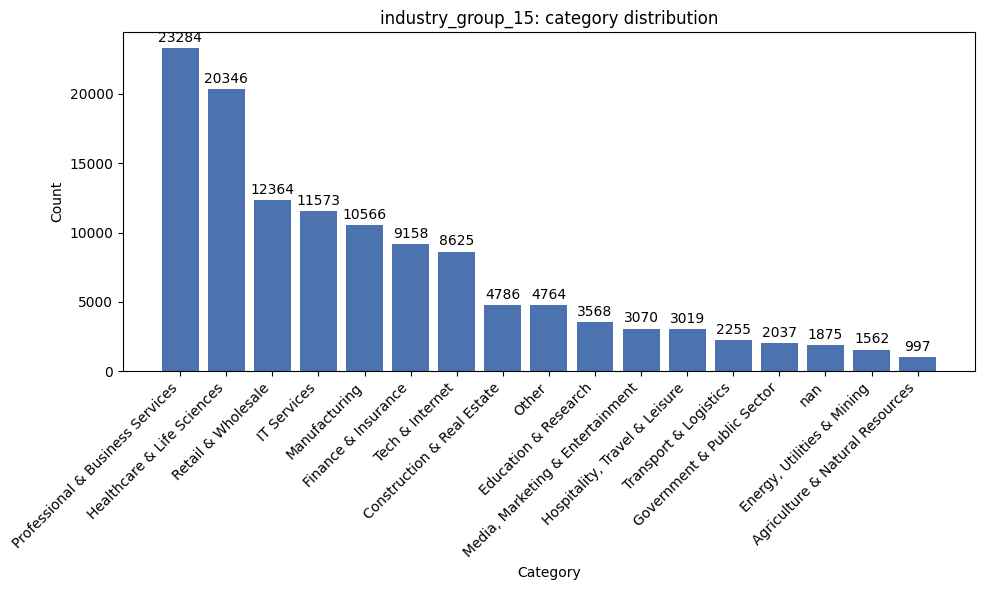

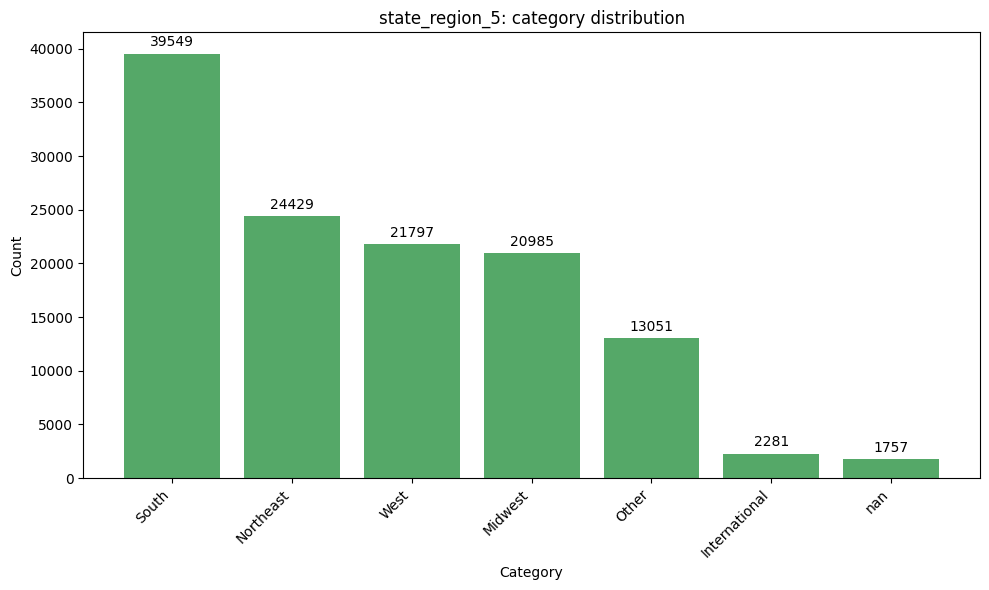

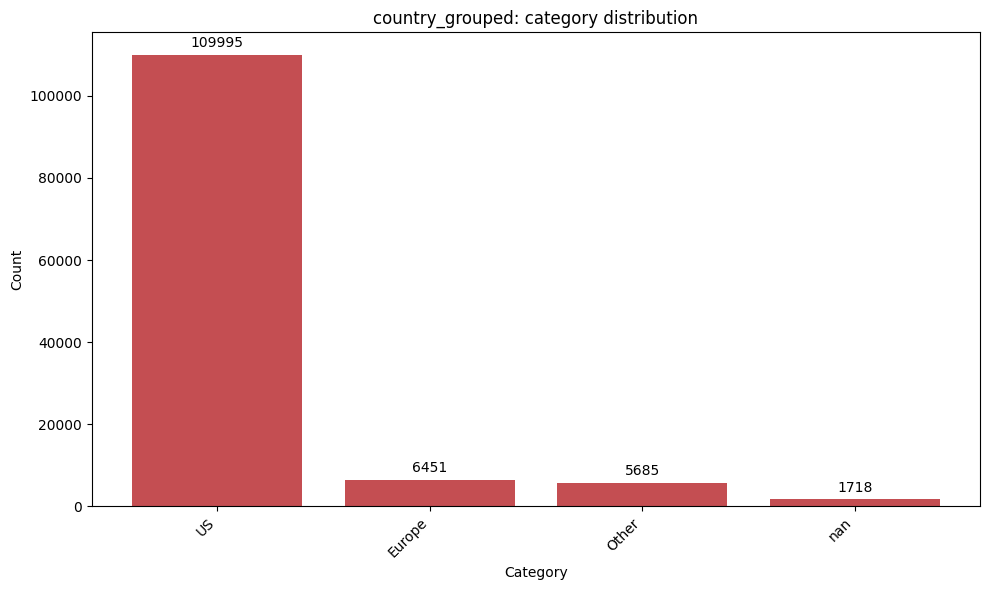

In [73]:
import matplotlib.pyplot as plt

cols = ["industry_group_15", "state_region_5", "country_grouped"]

# Simple color palette
colors = ["#4C72B0", "#55A868", "#C44E52"]

for col, color in zip(cols, colors):
    counts = df_state[col].value_counts(dropna=False)

    plt.figure(figsize=(10,6))
    bars = plt.bar(counts.index.astype(str), counts.values, color=color)

    plt.title(f"{col}: category distribution")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.xticks(rotation=45, ha='right')

    # Add labels above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height + max(counts.values)*0.01,
                 str(height),
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [74]:
# Rename the working dataframe
df_cat = df_state.copy()

df_cat.head()


,job_id,title,description,job_skills,job_industries,pay_period,compensation_type,max_salary,med_salary,min_salary,...,city,fips,name,description_company,address,follower_count,time_recorded,emp_year,emp_month,currency
0,921716,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Marketing; Sales,Real Estate,HOURLY,BASE_SALARY,20.0,NaN,17.0,...,Jersey City,34021.0,Corcoran Sawyer Smith,With years of experience helping local buyers ...,242 Tenth Street,2351.0,1.713409e+09,2024.0,4.0,USD
1,1829192,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",Health Care Provider,NaN,HOURLY,BASE_SALARY,50.0,NaN,30.0,...,NaN,8069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD
2,10998357,Assitant Restaurant Manager,The National Exemplar is accepting application...,Management; Manufacturing,Restaurants,YEARLY,BASE_SALARY,65000.0,NaN,45000.0,...,Mariemont,39061.0,The National Exemplar,"In April of 1983, The National Exemplar began ...",6880 Wooster Pike,40.0,1.713279e+09,2024.0,4.0,USD
3,23221523,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,Other,Law Practice,YEARLY,BASE_SALARY,175000.0,NaN,140000.0,...,Lake Success,36059.0,"Abrams Fensterman, LLP","Abrams Fensterman, LLP is a full-service law f...",3 Dakota Drive,2427.0,1.712897e+09,2024.0,4.0,USD
4,35982263,Service Technician,Looking for HVAC service tech with experience ...,Information Technology,Facilities Services,YEARLY,BASE_SALARY,80000.0,NaN,60000.0,...,NaN,19057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD


In [75]:
# Drop unnecessary columns
# Backup columns

# listed_year_backup = df_cat["listed_year"].copy()
# listed_month_backup = df_cat["listed_month"].copy()
# expiry_year_backup = df_cat["expiry_year"].copy()
# expiry_month_backup = df_cat["expiry_month"].copy()
state_backup = df_cat["state"].copy()
country_backup = df_cat["country"].copy()
time_recorded = df_cat["time_recorded"].copy()
emp_year=df_cat["emp_year"].copy()
emp_month=df_cat["emp_month"].copy()

# Drop columns from df_cat
df_cat = df_cat.drop(columns=[
    # "listed_year",
    # "listed_month",
    # "expiry_year",
    # "expiry_month",
    "state",
    "country",
    "emp_month",
    "time_recorded",
    "emp_year"
])



In [76]:
# df_cat["listed_year"] = listed_year_backup
# df_cat["listed_month"] = listed_month_backup
# df_cat["expiry_year"] = expiry_year_backup
# df_cat["expiry_month"] = expiry_month_backup


In [77]:
df_cat["listed_year"] = df_cat["listed_year"].astype(float)
df_cat["listed_month"] = df_cat["listed_month"].astype(float)
df_cat["expiry_year"] = df_cat["expiry_year"].astype(float)
df_cat["expiry_month"] = df_cat["expiry_month"].astype(float)


In [78]:
# Convert industry_group_15 to categorical
df_cat["industry_group_15"] = df_cat["industry_group_15"].astype("category")


In [79]:
company_industries = df_cat["company_industries"].copy()

df_cat = df_cat.drop(columns=["company_industries"])

In [80]:
df_cat.groupby("company_size")["employee_count"].describe()


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
1.0,9123.0,117.525704,1061.338386,0.0,14.0,28.0,65.0,29207.0
2.0,13389.0,149.074091,273.991430,0.0,54.0,87.0,158.0,14861.0
3.0,9358.0,421.001817,701.074240,0.0,147.0,281.0,459.0,22333.0
4.0,8894.0,852.874635,2640.065726,0.0,313.0,556.0,917.0,206082.0
5.0,22453.0,2212.252928,3181.533329,0.0,685.0,1388.0,2388.0,63379.0
6.0,11146.0,5026.701776,4238.922321,0.0,2382.0,4303.0,6166.0,35486.0
7.0,42779.0,46994.989621,92889.049534,0.0,8984.0,19253.0,42695.0,748312.0


In [81]:
# Create mapping
size_map = {
    1: "10–70 employees",
    2: "50–160 employees",
    3: "150–460 employees",
    4: "300–900 employees",
    5: "700–2400 employees",
    6: "2400–6200 employees",
    7: "9000–43000 employees"
}

# Create the column
df_cat["company_size_label"] = df_cat["company_size"].map(size_map)


In [82]:
df_cat[["company_size", "company_size_label"]].head()


,company_size,company_size_label
0,2.0,50–160 employees
1,NaN,NaN
2,1.0,10–70 employees
3,2.0,50–160 employees
4,NaN,NaN


In [83]:
df_cat["company_size_label"] = pd.Categorical(
    df_cat["company_size_label"],
    categories=[
        "10–70 employees",
        "50–160 employees",
        "150–460 employees",
        "300–900 employees",
        "700–2400 employees",
        "2400–6200 employees",
        "9000–43000 employees"
    ],
    ordered=True
)


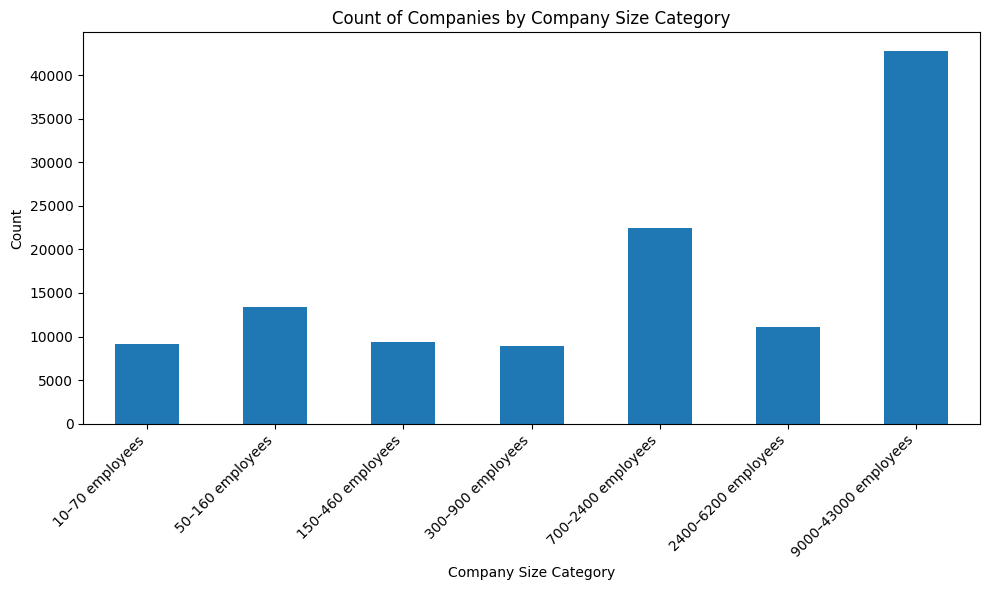

In [84]:
import matplotlib.pyplot as plt

counts = df_cat["company_size_label"].value_counts().sort_index()

plt.figure(figsize=(10,6))
counts.plot(kind="bar")
plt.xlabel("Company Size Category")
plt.ylabel("Count")
plt.title("Count of Companies by Company Size Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [85]:
# Backup columns before dropping
company_size_backup = df_cat["company_size"].copy()
employee_count_backup = df_cat["employee_count"].copy()

# Drop the columns from df_cat
df_cat = df_cat.drop(columns=["company_size", "employee_count"])


In [86]:
df_cat.groupby("currency").describe()

/tmp/ipython-input-764106336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby("currency").describe()


job_id                                                     \
            count               mean               std           min   
currency                                                               
AUD           2.0       3896898291.0    7203045.049933  3891804969.0   
BBD           2.0       3888975537.0       1243.093721  3888974658.0   
CAD           3.0       3889713418.0    4260889.247639  3885870216.0   
EUR           6.0  3898808761.333333    7067870.345722  3889710534.0   
GBP           2.0       3903447727.0       1974.242133  3903446331.0   
USD       36058.0  3895229818.334683  100865988.094513      921716.0   

                                                                  max_salary  \
                    25%           50%           75%           max      count   
currency                                                                       
AUD        3894351630.0  3896898291.0  3899444952.0  3901991613.0        2.0   
BBD        3888975097.5  3888975537.0  3888975976.5  3888976416.0        2.0   
CAD        3887422436.5  3888974657.0  3891635019.0  3894295381.0        3.0   
EUR       3892870271.25  3902893796.0  3903724189.0  3903824359.0        6.0   
GBP        3903447029.0  3903447727.0  3903448425.0  3903449123.0        2.0   
USD        3894896129.0  3901980476.0  3904570998.0  3906267224.0    29778.0   

                         ...     fips          follower_count                 \
                   mean  ...      75%      max          count           mean   
currency                 ...                                                   
AUD       114591.000000  ...      NaN      NaN            0.0            NaN   
BBD        68750.000000  ...   4131.0   5145.0            2.0  207884.000000   
CAD        87086.666667  ...  33528.0  34027.0            3.0  455581.333333   
EUR        30445.333333  ...  42077.0  48139.0            6.0   94729.500000   
GBP           12.500000  ...   5085.0   5085.0            2.0  102926.000000   
USD        91958.513136  ...  39094.0  56045.0        35550.0  690772.388861   

                                                                              
                   std       min        25%       50%        75%         max  
currency                                                                      
AUD                NaN       NaN        NaN       NaN        NaN         NaN  
BBD       0.000000e+00  207884.0  207884.00  207884.0  207884.00    207884.0  
CAD       4.591070e+05  173519.0  190701.50  207884.0  596612.50    985341.0  
EUR       1.422807e+05    1914.0    3213.00    3213.0  209612.25    278412.0  
GBP       0.000000e+00  102926.0  102926.00  102926.0  102926.00    102926.0  
USD       2.825741e+06       0.0   12435.25   62285.0  272833.00  32702835.0  

[6 rows x 176 columns]

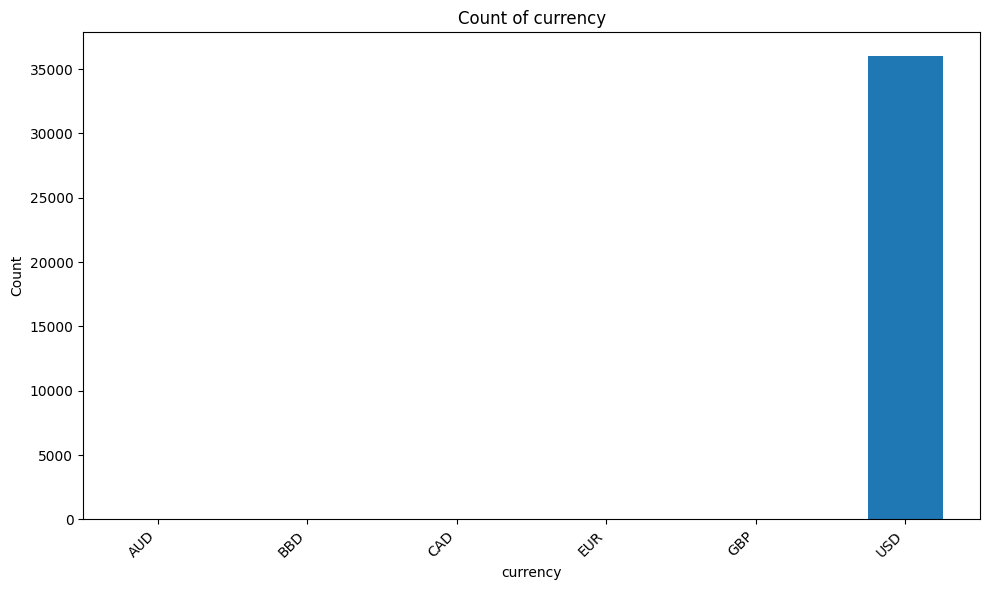

In [87]:
import matplotlib.pyplot as plt

counts = df_cat["currency"].value_counts().sort_index()

plt.figure(figsize=(10,6))
counts.plot(kind="bar")
plt.xlabel("currency")
plt.ylabel("Count")
plt.title("Count of currency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [88]:
# Backup columns before dropping
company_id_backup = df_cat["company_id"].copy()
job_id_backup = df_cat["job_id"].copy()

# Drop the columns from df_cat
df_cat = df_cat.drop(columns=["company_id", "job_id"])

In [89]:
# Backup columns before dropping
zip_code_company_backup = df_cat["zip_code_company"].copy()


# Drop the columns from df_cat
df_cat = df_cat.drop(columns=["zip_code_company"])

In [90]:
# Convert  to categorical
df_cat["job_industries"] = df_cat["job_industries"].astype("category")

df_cat["remote_allowed"] = df_cat["remote_allowed"].astype("category")

df_cat["city"] = df_cat["city"].astype("category")

df_cat["city"] = df_cat["city"].astype("category")

df_cat["job_skills"] = df_cat["job_skills"].astype("category")


In [91]:
print("listed_time dtype:", df_cat["listed_time"].dtype)
print("expiry dtype:", df_cat["expiry"].dtype)

print("\nlisted_time samples:")
print(df_cat["listed_time"].head())

print("\nexpiry samples:")
print(df_cat["expiry"].head())


listed_time dtype: float64
expiry dtype: float64

listed_time samples:
0    1.713398e+12
1    1.712858e+12
2    1.713278e+12
3    1.712896e+12
4    1.713452e+12
Name: listed_time, dtype: float64

expiry samples:
0    1.715990e+12
1    1.715450e+12
2    1.715870e+12
3    1.715488e+12
4    1.716044e+12
Name: expiry, dtype: float64


In [92]:
df_cat["listed_time_dt"] = pd.to_datetime(df_cat["listed_time"], unit="ms", errors="coerce")
df_cat["expiry_dt"] = pd.to_datetime(df_cat["expiry"], unit="ms", errors="coerce")

df_cat["posting_days"] = (df_cat["expiry_dt"] - df_cat["listed_time_dt"]).dt.days

df_cat[["listed_time", "expiry", "listed_time_dt", "expiry_dt", "posting_days"]].head()


,listed_time,expiry,listed_time_dt,expiry_dt,posting_days
0,1.713398e+12,1.715990e+12,2024-04-17 23:45:08,2024-05-17 23:45:08,30
1,1.712858e+12,1.715450e+12,2024-04-11 17:51:27,2024-05-11 17:51:27,30
2,1.713278e+12,1.715870e+12,2024-04-16 14:26:54,2024-05-16 14:26:54,30
3,1.712896e+12,1.715488e+12,2024-04-12 04:23:32,2024-05-12 04:23:32,30
4,1.713452e+12,1.716044e+12,2024-04-18 14:52:23,2024-05-18 14:52:23,30


In [93]:
df_cat["posting_days"].value_counts().sort_index()




,count
posting_days,
3,3
4,4
5,5
6,8
7,5
8,3
9,11
10,1
11,4


In [94]:
# Backup helper columns
listed_time_dt_backup = df_cat["listed_time_dt"].copy()
expiry_dt_backup = df_cat["expiry_dt"].copy()

# Drop helper columns
df_cat = df_cat.drop(columns=["listed_time_dt", "expiry_dt"])


In [95]:
df_cat.columns

Index(['title', 'description', 'job_skills', 'job_industries', 'pay_period',
       'compensation_type', 'max_salary', 'med_salary', 'min_salary',
       'normalized_salary', 'job_benefit_categories', 'views', 'skills_desc',
       'formatted_work_type', 'remote_allowed', 'applies', 'work_type',
       'sponsored', 'application_type', 'formatted_experience_level',
       'original_listed_time', 'listed_time', 'listed_year', 'listed_month',
       'closed_time', 'expiry', 'expiry_year', 'expiry_month',
       'job_posting_url', 'application_url', 'url', 'posting_domain',
       'company_name', 'industry_group_15', 'location', 'zip_code',
       'state_region_5', 'country_grouped', 'city', 'fips', 'name',
       'description_company', 'address', 'follower_count', 'currency',
       'company_size_label', 'posting_days'],
      dtype='object')

In [96]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   title                       123849 non-null  object  
 1   description                 123842 non-null  object  
 2   job_skills                  122096 non-null  category
 3   job_industries              122313 non-null  category
 4   pay_period                  36073 non-null   category
 5   compensation_type           36073 non-null   category
 6   max_salary                  29793 non-null   float64 
 7   med_salary                  6280 non-null    float64 
 8   min_salary                  29793 non-null   float64 
 9   normalized_salary           36073 non-null   float64 
 10  job_benefit_categories      28735 non-null   category
 11  views                       122160 non-null  float64 
 12  skills_desc                 2439 non-null    object  
 13 

In [97]:
# # Save df_cat as a pickle
# df_cat.to_pickle("df_cat.pkl")

# print("Pickle created: df_cat.pkl")


In [98]:
# from google.colab import files
# files.download("df_cat.pkl")


In [99]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Choose a fixed folder in Drive where all notebooks will load from
# save_path = "/content/drive/MyDrive/df_cat.pkl"

# df_cat.to_pickle(save_path)

# print("Saved to Drive at:", save_path)


In [100]:
# df_cat.to_parquet("df_cat.parquet")


In [101]:
# df_cat.to_csv("df_cat.csv", index=False)
# print("Saved df_cat.csv")


Saved df_cat.csv
